# TASK 5

SALES PREDICTION USING PYTHON

- Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
- Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

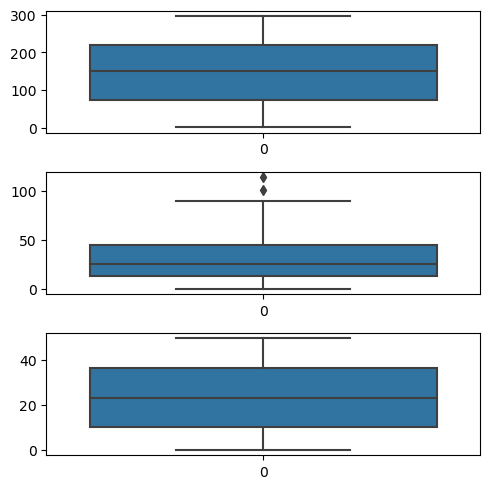

In [12]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: ylabel='Frequency'>

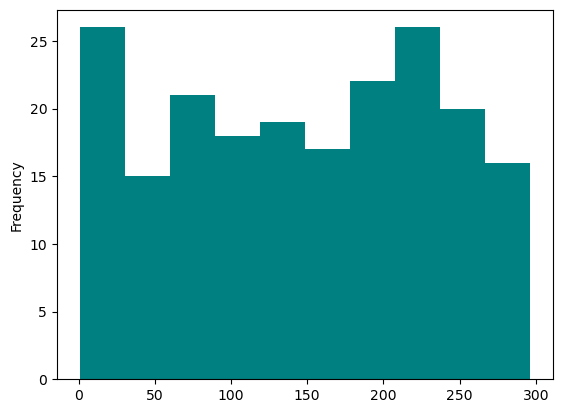

In [13]:
df['TV'].plot.hist(bins = 10, color = "teal", xlabel = "TV")

<Axes: ylabel='Frequency'>

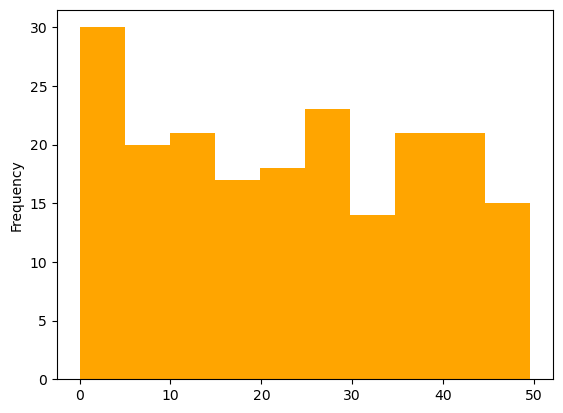

In [14]:
df['Radio'].plot.hist(bins = 10, color = "orange", xlabel = "Radio")

<Axes: ylabel='Frequency'>

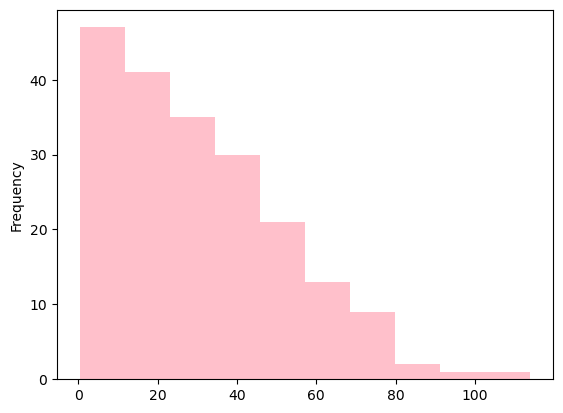

In [15]:
df['Newspaper'].plot.hist(bins = 10, color = "pink", xlabel = "Newpaper")

EDA

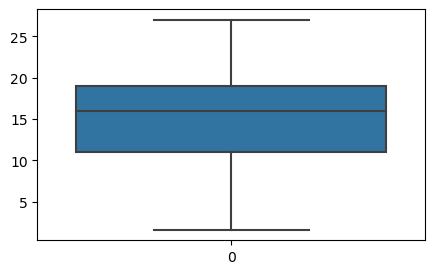

In [17]:
plt.figure(figsize=(5,3))
sns.boxplot(df['Sales'])
plt.show()

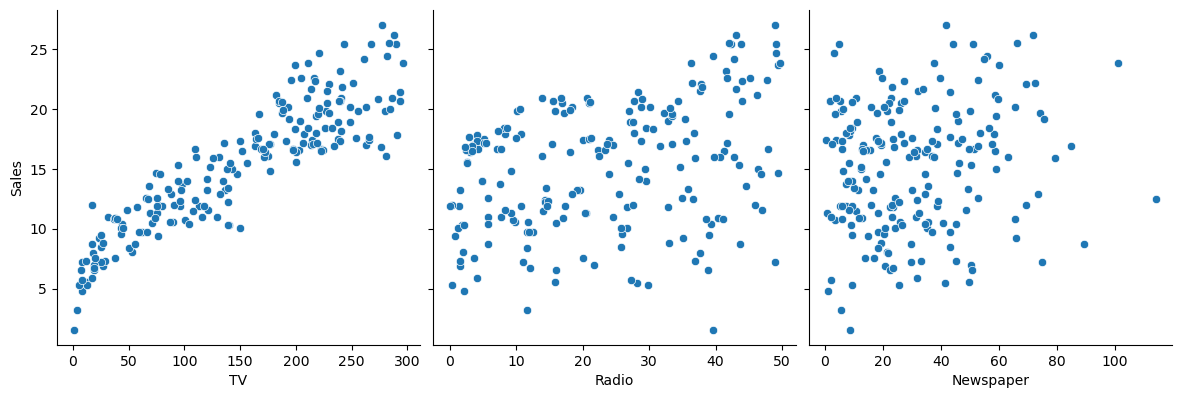

In [18]:
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', height = 4)
plt.show()

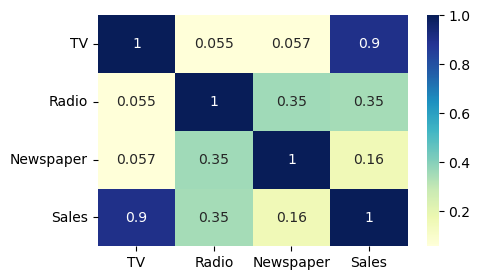

In [19]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True)
plt.show()

Model Building

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['TV']], df[['Sales']], train_size = 0.7, test_size=0.3, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
x_train

,TV
131,265.2
96,197.6
181,218.5
19,147.3
153,171.3
...,...
67,139.3
192,17.2
117,76.4
47,239.9


In [23]:
y_train

,Sales
131,17.7
96,16.7
181,17.2
19,14.6
153,16.0
...,...
67,13.4
192,5.9
117,9.4
47,23.2


In [24]:
x_train.head()

,TV
131,265.2
96,197.6
181,218.5
19,147.3
153,171.3


In [25]:
y_train.head()

,Sales
131,17.7
96,16.7
181,17.2
19,14.6
153,16.0


In [26]:
x_test.head()

,TV
18,69.2
170,50.0
107,90.4
98,289.7
177,170.2


In [27]:
y_test.head()

,Sales
18,11.3
170,8.4
107,12.0
98,25.4
177,16.7


In [28]:
res = model.predict(x_test)
print(res)

[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


In [29]:
print("Accuracy Score: ", model.score(x_test, y_test)*100)

Accuracy Score:  81.50168765722069


In [30]:
model.coef_

array([[0.05473199]])

In [31]:
model.intercept_

array([7.14382225])

In [32]:
0.05473199*69.2 + 7.14382225

10.931275958

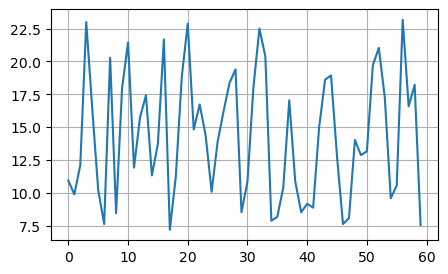

In [33]:
plt.figure(figsize=(5,3))
plt.grid()
plt.plot(res)

In [34]:
import statsmodels.api as sm

In [35]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

In [36]:
lr.params

const    7.143822
TV       0.054732
dtype: float64

In [37]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.1
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           5.56e-51
Time:                        20:02:03   Log-Likelihood:                -312.40
No. Observations:                 140   AIC:                             628.8
Df Residuals:                     138   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1438      0.400     17.838      0.0

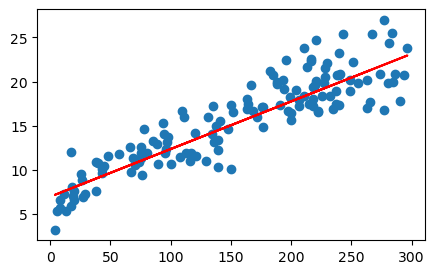

In [38]:
plt.figure(figsize=(5,3))
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948+0.054*x_train, 'r')
plt.show()

Predictions on the test set

In [42]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)

In [43]:
y_pred.head()

18     10.931276
170     9.880422
107    12.091594
98     22.999681
177    16.459208
dtype: float64

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.359987117224847

In [46]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8150168765722069

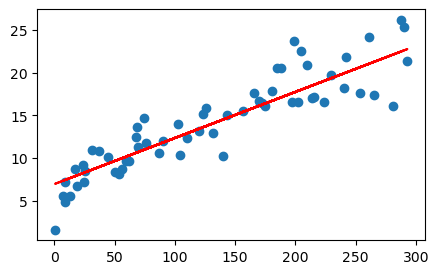

In [47]:
plt.figure(figsize=(5,3))
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948+0.054*x_test, 'r')
plt.show()